# HW 1 Data mining - Analysis
## Author : Lukáš Bíro

## Table of content:
   * [Importing libraries](#Importing-libraries)
   * [Loading datasets](#Loading-datasets)
   * [Defining a function and first preprocessing](#Defining-a-function-and-first-preprocessing)
   * [Candidating people and parties analysis](#Candidating-people-and-parties-analysis)
   * [Analysis of the age of the candidates](#Analysis-of-the-age-of-the-candidates)
   * [Time development of voting rate and voting results](#Time-development-of-voting-rate-and-voting-results)
   * [Candidates with and without a degree](#Candidates-with-and-without-a-degree)
   * [Bonus - top 10 most active candidates](#Bonus---top-10-most-active-candidates)

## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ipywidgets import widgets
from IPython.display import display, clear_output
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

## Loading datasets

In [2]:
#loading the datasets from csv
df_kand = pd.read_csv('dataset_kand.csv')
df_strany = pd.read_csv('dataset_strany.csv')

#displaying both datasets to see the problems, like double indexing
display(df_kand.head())
display(df_strany.head())

,Unnamed: 0,Kandidátní listina,Poř.číslo,"Příjmení, jméno",Titul,Věk,Navrh.strana,Polit.přísl.,Absolutní hlasy,Hlasy v %,Pořadí,Mandát,Rok
0,0,Česká pravice,9,Adámek Petr,NaN,54,ČP,BEZPP,419,2.41,NaN,NaN,2002
1,1,Karlovarská koalice,19,Andrejkivová Pavla,NaN,56,KDU-ČSL,KDU-ČSL,3158,3.14,4.0,*,2002
2,2,Karlovarská koalice,20,Antonik Jozef,NaN,58,VPM,BEZPP,2588,2.57,11.0,NaN,2002
3,3,Komunistická str.Čech a Moravy,14,Aubrecht Miroslav,NaN,73,KSČM,KSČM,1858,2.58,8.0,NaN,2002
4,4,Strana zelených,9,Balák Libor,NaN,41,SZ,BEZPP,1229,4.35,2.0,NaN,2002


,Unnamed: 0,Kandidátní listina,Absolutní hlasy,Hlasy v %,Počet kandidátů,Přepočtený základ dle počtu kandidátů,Přepočtené % plat. hlasů,Počet mandátů,Podíly hlasů,Vol. účast v %,Rok
0,0,Pravý Blok,958,0.19,11,149 073.15,0.64,0,NaN,34.12,2002
1,1,Strana za životní jistoty,906,0.18,7,94 864.73,0.95,0,NaN,34.12,2002
2,2,Česká pravice,17 360,3.37,38,514 980.00,3.37,0,NaN,34.12,2002
3,3,"Dem.K.V.-S.ODA, N.P.a Zak.č.US",24 320,4.72,38,514 980.00,4.72,0,NaN,34.12,2002
4,4,Komunistická str.Čech a Moravy,71 746,13.93,38,514 980.00,13.93,6,X,34.12,2002


## Defining a function and first preprocessing

In [3]:
# defining a function to plot the histogram with some pre-set values
def histogram_years (y, colour, y_height, ylabel, title, x = df_strany['Rok'].unique()):
    plt.bar(x, y, width = 2, align = 'center', color = colour)
    plt.xlim([2000, 2020])
    plt.ylim([0, y_height])
    plt.xticks(np.arange(2002, 2020, 4))
    plt.title(title)
    plt.xlabel('Rok')
    plt.ylabel(ylabel)
    
# dropping index column to avoid double indexing, 
try:
    del df_kand['Unnamed: 0'] 
    del df_strany['Unnamed: 0'] 
except:
    pass

#setting the index to ID
df_kand.index.names = ['ID']
df_strany.index.names = ['ID']

#changing the value type, replacing commas with dots
try:
    df_strany['Vol. účast v %'] = df_strany['Vol. účast v %'].apply(lambda x: float(x.replace(',' ,'.')))
    df_strany['Hlasy v %'] = df_strany['Hlasy v %'].apply(lambda x: float(x.replace(',' ,'.')))
except:
    pass

display(df_kand.head())
display(df_strany.head())

,Kandidátní listina,Poř.číslo,"Příjmení, jméno",Titul,Věk,Navrh.strana,Polit.přísl.,Absolutní hlasy,Hlasy v %,Pořadí,Mandát,Rok
ID,,,,,,,,,,,,
0,Česká pravice,9,Adámek Petr,NaN,54,ČP,BEZPP,419,2.41,NaN,NaN,2002
1,Karlovarská koalice,19,Andrejkivová Pavla,NaN,56,KDU-ČSL,KDU-ČSL,3158,3.14,4.0,*,2002
2,Karlovarská koalice,20,Antonik Jozef,NaN,58,VPM,BEZPP,2588,2.57,11.0,NaN,2002
3,Komunistická str.Čech a Moravy,14,Aubrecht Miroslav,NaN,73,KSČM,KSČM,1858,2.58,8.0,NaN,2002
4,Strana zelených,9,Balák Libor,NaN,41,SZ,BEZPP,1229,4.35,2.0,NaN,2002


,Kandidátní listina,Absolutní hlasy,Hlasy v %,Počet kandidátů,Přepočtený základ dle počtu kandidátů,Přepočtené % plat. hlasů,Počet mandátů,Podíly hlasů,Vol. účast v %,Rok
ID,,,,,,,,,,
0,Pravý Blok,958,0.19,11,149 073.15,0.64,0,NaN,34.12,2002
1,Strana za životní jistoty,906,0.18,7,94 864.73,0.95,0,NaN,34.12,2002
2,Česká pravice,17 360,3.37,38,514 980.00,3.37,0,NaN,34.12,2002
3,"Dem.K.V.-S.ODA, N.P.a Zak.č.US",24 320,4.72,38,514 980.00,4.72,0,NaN,34.12,2002
4,Komunistická str.Čech a Moravy,71 746,13.93,38,514 980.00,13.93,6,X,34.12,2002


We can see that the dataframes are without double indexing and numbers are of type float so can be used for further analysis!!

## Candidating people and parties analysis

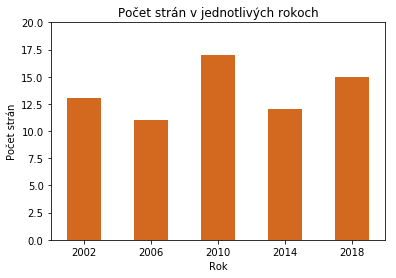

In [4]:
histogram_years(df_strany.groupby(['Rok']).count()['Kandidátní listina'], 'chocolate', 20, 'Počet strán', 'Počet strán v jednotlivých rokoch')

In [7]:
#creating different dataset for the coming analysis of 
unique_kand = df_kand.groupby(['Rok', 'Kandidátní listina']).count().loc[:,('Příjmení, jméno', 'Titul')]                   
unique_kand = unique_kand.reset_index()
unique_kand.head()

,Rok,Kandidátní listina,"Příjmení, jméno",Titul
0,2002,"Dem.K.V.-S.ODA, N.P.a Zak.č.US",38,17
1,2002,Karlovarská koalice,37,23
2,2002,Komunistická str.Čech a Moravy,38,4
3,2002,NEZÁVISLÍ,37,1
4,2002,Občanská demokratická strana,38,16


In [8]:
'''This is a block of code to enable user to filter through political parties in '''
Všetky = 'ALL'

def unique_sorted_values_plus_ALL(unique):
    unique.insert(0, Všetky)
    return unique

dropdown_strana = widgets.Dropdown(
    options = unique_sorted_values_plus_ALL(list(unique_kand['Kandidátní listina'].unique())),
    description='Vyber stranu:',
    disabled=False,
)

output_strana_kand = widgets.Output()

def dropdown_strana_kand_eventhandler(change):
    with output_strana_kand:
        clear_output()
        if (change.new == Všetky):
            histogram_years(df_kand.groupby(['Rok']).count()['Kandidátní listina'], 'forestgreen', 600, 'Počet kandidátov', 'Počet kandidujúcich v jednotlivých rokoch')
            show_inline_matplotlib_plots()
        else:
            histogram_years(unique_kand[unique_kand['Kandidátní listina']==change.new].iloc[:,2], 'lightskyblue', 50, 'Počet kandidátov', 'Počet kandidujúcich ľudí za stranu v jednotlivých rokoch', unique_kand[unique_kand['Kandidátní listina']==change.new].iloc[:,0])
            show_inline_matplotlib_plots()

            
dropdown_strana.observe(dropdown_strana_kand_eventhandler, names='value')
display(dropdown_strana)


Dropdown(description='Vyber stranu:', options=('ALL', 'Dem.K.V.-S.ODA, N.P.a Zak.č.US', 'Karlovarská koalice',…

You need to firstly run the cell below to see the output after filtering!

In [9]:
display(output_strana_kand)

Output()

## Analysis of the age of the candidates
### Preparing the data

In [10]:
#Adding a new column to df_kand dataset for age group to be able to use it later in the analysis
df_kand['Věkové skupiny'] = df_kand['Věk'].apply(lambda x: (18 <= x <= 27 and '18 až 27') or (28 <= x <= 37 and '28 až 37') or (38 <= x <= 47 and '38 až 47') or (48 <= x <= 57 and '48 až 57') or (58 <= x <= 67 and '58 až 67') or '68 a viac')
df_kand.head()

#Creating new datasets to be able to analyze them, df is for overall age development of the candidates during different elections and df_strana is prepared to be for one political party
df = ((df_kand.groupby(['Věkové skupiny', 'Rok']).count()).unstack()).iloc[:,0:5]
df_strana = df_kand.groupby(['Kandidátní listina','Věkové skupiny', 'Rok']).count().unstack().iloc[:,0:5].fillna(0) #filling datasets with 0 instead of NAn

#Adding total row to the dataframe to be able to calculate percentages for respective age groups
total = []
for i in range(5):
    total.append(df.iloc[0:6,i].values.sum())
df.loc['Total'] = total
display(df)
display(df_strana.head())

Kandidátní listina                    
Rok                          2002 2006 2010 2014 2018
Věkové skupiny                                       
18 až 27                       45   40   62   27   43
28 až 37                       77  101  108   76   84
38 až 47                      102   91  124   94  123
48 až 57                       82   79  116   97  106
58 až 67                       70   57   83   62   98
68 a viac                      48   29   47   38   70
Total                         424  397  540  394  524

Poř.číslo                     
Rok                                    2002 2006 2010  2014 2018
Kandidátní listina Věkové skupiny                               
ALTERNATIVA        18 až 27             0.0  0.0  0.0   3.0  0.0
                   28 až 37             0.0  0.0  0.0   8.0  0.0
                   48 až 57             0.0  0.0  0.0  18.0  0.0
                   58 až 67             0.0  0.0  0.0   5.0  0.0
                   68 a viac            0.0  0.0  0.0   1.0  0.0

### Analysis - graphs

In [11]:
output_strana_vek = widgets.Output()
#df_strana = df_kand.groupby(['Kandidátní listina','Věkové skupiny', 'Rok']).count().unstack().iloc[:,0:5]

def dropdown_strana_vek_eventhandler(change):
    #output_strana.clear_output()
    with output_strana_vek:
        clear_output()
        if (change.new == Všetky):
            '''The first graph from two that will appear after using filter in case of displaying values for all parties'''
            do27 = df.iloc[0].values
            do37 = df.iloc[1].values
            do47 = df.iloc[2].values
            do57 = df.iloc[3].values
            do67 = df.iloc[4].values
            nad67 = df.iloc[5].values

            width = 1       # the width of the bars
            x = df_kand['Rok'].unique() # content on the x axis, will be used in all remaining graphs, that is why is defined only once.

            #Creating the stacked bars, bottom says when the bar should start
            p1 = plt.bar(x, do27, width)
            p2 = plt.bar(x, do37, width, bottom = do27)
            p3 = plt.bar(x, do47, width, bottom = do27 + do37)
            p4 = plt.bar(x, do57, width, bottom = do27 + do37 + do47)
            p5 = plt.bar(x, do67, width, bottom = do27 + do37 + do47 + do57)
            p6 = plt.bar(x, nad67,width, bottom = do27 + do37 + do47 + do57 + do67)

            #Defining titles, labels, and legend
            plt.xlabel('Rok')
            plt.ylabel('Počet kandidátu')
            plt.title('Věková struktura kandidátu')
            plt.xticks(x)
            plt.yticks(np.arange(0, 550, 50))
            legend = plt.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0]), ('nad67', '58 až 67', '48 až 57', '38 až 47', '28 až 37','18 až 27'), loc = 'lower left', bbox_to_anchor=(1, 0.5)) # bbox puts the legend out of the graph

            plt.show()

            do27 = df.iloc[0,:].values/total*100
            do37 = df.iloc[1,:].values/total*100
            do47 = df.iloc[2,:].values/total*100
            do57 = df.iloc[3,:].values/total*100
            do67 = df.iloc[4,:].values/total*100
            nad67 = df.iloc[5,:].values/total*100

            p1 = plt.bar(x, do27, width)
            p2 = plt.bar(x, do37, width, bottom = do27)
            p3 = plt.bar(x, do47, width, bottom = do27 + do37)
            p4 = plt.bar(x, do57, width, bottom = do27 + do37 + do47)
            p5 = plt.bar(x, do67, width, bottom = do27 + do37 + do47 + do57)
            p6 = plt.bar(x, nad67,width, bottom = do27 + do37 + do47 + do57 + do67)

            plt.xlabel('Rok')
            plt.ylabel('Procento kandidátu')
            plt.title('Věková struktura kandidátu v procentách')
            plt.xticks(x)
            plt.yticks(np.arange(0, 110, 10))
            legend = plt.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0]), ('nad67', '58 až 67', '48 až 57', '38 až 47', '28 až 37','18 až 27'), loc = 'lower left', bbox_to_anchor=(1, 0.5))

            plt.show()
            show_inline_matplotlib_plots()
        else:
            'The only graph displayed in case of filtering one specific political party'
            df_agebrackets = df_strana.loc[change.new]
            try:
                do27 = df_agebrackets.loc['18 až 27'].values
            except:
                do27 = [0,0,0,0,0]
            try:
                do37 = df_agebrackets.loc['28 až 37'].values
            except:
                do37 = [0,0,0,0,0]
            try:
                do47 = df_agebrackets.loc['38 až 47'].values
            except:
                do47 = [0,0,0,0,0]
            try:
                do57 = df_agebrackets.loc['48 až 57'].values
            except:
                do57 = [0,0,0,0,0]
            try:
                do67 = df_agebrackets.loc['58 až 67'].values
            except:
                do67 = [0,0,0,0,0]
            try:
                nad67 = df_agebrackets.loc['68 a viac'].values
            except:
                nad67 = [0,0,0,0,0]

            width = 1       # the width of the bars
            x = df_kand['Rok'].unique()

            p1 = plt.bar(x, do27, width)
            p2 = plt.bar(x, do37, width, bottom = do27)
            p3 = plt.bar(x, do47, width, bottom = do27 + do37)
            p4 = plt.bar(x, do57, width, bottom = do27 + do37 + do47)
            p5 = plt.bar(x, do67, width, bottom = do27 + do37 + do47 + do57)
            p6 = plt.bar(x, nad67,width, bottom = do27 + do37 + do47 + do57 + do67)

            plt.xlabel('Rok')
            plt.ylabel('Počet kandidátu')
            plt.title('Věková struktura kandidátu')
            plt.xticks(x)
            legend = plt.legend((p6[0], p5[0], p4[0], p3[0], p2[0], p1[0]), ('nad67', '58 až 67', '48 až 57', '38 až 47', '28 až 37','18 až 27'), loc = 'lower left', bbox_to_anchor=(1, 0.5))

            plt.show()

dropdown_strana.observe(dropdown_strana_vek_eventhandler, names='value')
display(dropdown_strana)

Dropdown(description='Vyber stranu:', options=('ALL', 'Dem.K.V.-S.ODA, N.P.a Zak.č.US', 'Karlovarská koalice',…

In [15]:
display(output_strana_vek)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 1 Axes>', 'i…

## Time development of voting rate and voting results 

In [17]:
# creating new dataset for the sake of future analysis
unique_strany = df_strany.groupby(['Kandidátní listina', 'Rok']).sum().reset_index()
unique_strany.iloc[:,2].head()
display(unique_strany.head())

,Kandidátní listina,Rok,Hlasy v %,Počet kandidátů,Počet mandátů,Vol. účast v %
0,ALTERNATIVA,2014,5.91,35,2,33.20
1,ANO 2011,2014,15.39,35,6,33.20
2,ANO 2011,2018,23.86,35,12,37.61
3,Balbínova poetická strana,2006,0.89,30,0,35.72
4,"Dem.K.V.-S.ODA, N.P.a Zak.č.US",2002,4.72,38,0,34.12


In [18]:
output_strana_ucast = widgets.Output()

def dropdown_strana_ucast_eventhandler(change):
    with output_strana_ucast:
        clear_output()
        if (change.new == Všetky):
            plt.plot(df_strany['Rok'].unique(), df_strany['Vol. účast v %'].unique(), color = 'purple')
            plt.xlim([2000, 2020])
            plt.xticks(np.arange(2002, 2020, 4))
            plt.title('Volebná účasť v jednotlivých rokoch')
            plt.xlabel('Rok')
            plt.ylabel('Vol. účasť v %')
            show_inline_matplotlib_plots()
        else:
            plt.bar(unique_strany[unique_strany['Kandidátní listina']==change.new].iloc[:,1], unique_strany[unique_strany['Kandidátní listina']==change.new].iloc[:,2], color = 'teal')
            plt.xlim([2000, 2020])
            plt.xticks(np.arange(2002, 2020, 4))
            plt.title('Volebný výsledok strany v jednotlivých rokoch ')
            plt.xlabel('Rok')
            plt.ylabel('Vol. výsledok v %')
            show_inline_matplotlib_plots()

dropdown_strana.observe(dropdown_strana_ucast_eventhandler, names='value')
display(dropdown_strana)


Dropdown(description='Vyber stranu:', index=14, options=('ALL', 'Dem.K.V.-S.ODA, N.P.a Zak.č.US', 'Karlovarská…

In [19]:
#You have to run this cell before choosing a political party in the filter
display(output_strana_ucast)

Output()

## Candidates with and without a degree

Text(0, 0.5, 'Podiel kandidujúcich s titulom v %')

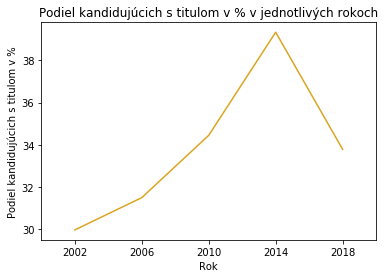

In [20]:
plt.plot(df_strany['Rok'].unique(),(df_kand.groupby(['Rok']).count()['Titul']/df_kand.groupby(['Rok']).count()['Věk'])*100, color = 'goldenrod')
plt.xlim([2000, 2020])
plt.xticks(np.arange(2002, 2020, 4))
plt.title('Podiel kandidujúcich s titulom v % v jednotlivých rokoch')
plt.xlabel('Rok')
plt.ylabel('Podiel kandidujúcich s titulom v %')

## Bonus - top 10 most active candidates

In [21]:
df_kand['Příjmení, jméno'] = df_kand['Příjmení, jméno'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1] if '.' in x else x)
top10 = df_kand.groupby(['Příjmení, jméno']).count().sort_values('Kandidátní listina', ascending = False).head(15).index
top10

'''Displaying top 15 most active candidates, however after a close look, we can see that there are few times 2 people with the same name in the same year.
That's why we need to somehow adjust for that fact and find the real top 10 most active candidates.'''


top10dataframe = pd.DataFrame()
for i in top10:
    top10dataframe = pd.concat([top10dataframe, df_kand[df_kand['Příjmení, jméno']== i]], ignore_index = True)

top10dataframe

,Kandidátní listina,Poř.číslo,"Příjmení, jméno",Titul,Věk,Navrh.strana,Polit.přísl.,Absolutní hlasy,Hlasy v %,Pořadí,Mandát,Rok,Věkové skupiny
0,Česká str.sociálně demokrat.,23,Růžička Jaroslav,NaN,33,ČSSD,ČSSD,2799,"2,55",14.0,NaN,2006,28 až 37
1,SNK Evropští demokraté,1,Růžička Jaroslav,RNDr.,44,SNK ED,SNK ED,1505,"4,31",1.0,*,2006,38 až 47
2,"Sdružení ALTERNATIVA, NK",2,Růžička Jaroslav,RNDr.,48,ALTER,BEZPP,2362,"3,80",2.0,*,2010,48 až 57
3,STAROSTOVÉ A NEZÁVISLÍ,1,Růžička Jaroslav,RNDr.,52,STAN,BEZPP,977,"7,17",NaN,NaN,2014,48 až 57
4,STAN a TOP 09,17,Růžička Jaroslav,RNDr.,56,STAN,BEZPP,555,"3,40",NaN,NaN,2018,48 až 57
5,"Karlovarská koal.-KDU-ČSL, VPM",9,Vlková Lenka,NaN,48,KDU-ČSL,BEZPP,878,"2,50",9.0,NaN,2006,48 až 57
6,TOP 09,7,Vlková Lenka,Ing.,52,TOP 09,TOP 09,1458,"2,75",4.0,NaN,2010,48 až 57
7,TOP 09,19,Vlková Lenka,Ing.,56,TOP 09,TOP 09,511,"2,69",NaN,NaN,2014,48 až 57
8,STAN a TOP 09,6,Vlková Lenka,Ing.,60,TOP 09,TOP 09,479,"2,93",NaN,NaN,2018,58 až 67
9,STAN a TOP 09,18,Vlková Lenka,Ing.,33,TOP 09,TOP 09,446,"2,73",NaN,NaN,2018,28 až 37


Displaying top 15 most active candidates, however after a close look, we can see that there are few times 2 people with the same name in the same year. That is why we need to somehow adjust for that fact and find the real top 10 most active candidates.

In [22]:
'I manually adjusted for occurences of people that should not belong to top 10 !'
top10dataframefilter = top10dataframe.drop([top10dataframe.index[0], top10dataframe.index[9], top10dataframe.index[10], top10dataframe.index[11], top10dataframe.index[12], top10dataframe.index[13]])
display(top10dataframefilter.iloc[:40,])

,Kandidátní listina,Poř.číslo,"Příjmení, jméno",Titul,Věk,Navrh.strana,Polit.přísl.,Absolutní hlasy,Hlasy v %,Pořadí,Mandát,Rok,Věkové skupiny
1,SNK Evropští demokraté,1,Růžička Jaroslav,RNDr.,44,SNK ED,SNK ED,1505,"4,31",1.0,*,2006,38 až 47
2,"Sdružení ALTERNATIVA, NK",2,Růžička Jaroslav,RNDr.,48,ALTER,BEZPP,2362,"3,80",2.0,*,2010,48 až 57
3,STAROSTOVÉ A NEZÁVISLÍ,1,Růžička Jaroslav,RNDr.,52,STAN,BEZPP,977,"7,17",NaN,NaN,2014,48 až 57
4,STAN a TOP 09,17,Růžička Jaroslav,RNDr.,56,STAN,BEZPP,555,"3,40",NaN,NaN,2018,48 až 57
5,"Karlovarská koal.-KDU-ČSL, VPM",9,Vlková Lenka,NaN,48,KDU-ČSL,BEZPP,878,"2,50",9.0,NaN,2006,48 až 57
6,TOP 09,7,Vlková Lenka,Ing.,52,TOP 09,TOP 09,1458,"2,75",4.0,NaN,2010,48 až 57
7,TOP 09,19,Vlková Lenka,Ing.,56,TOP 09,TOP 09,511,"2,69",NaN,NaN,2014,48 až 57
8,STAN a TOP 09,6,Vlková Lenka,Ing.,60,TOP 09,TOP 09,479,"2,93",NaN,NaN,2018,58 až 67
14,Občanská demokratická strana,27,Pánek Jan,Ing.,62,ODS,ODS,4588,"2,56",12.0,NaN,2006,58 až 67
15,Občanská demokratická strana,36,Pánek Jan,Ing.,66,ODS,ODS,1730,"2,16",29.0,NaN,2010,58 až 67


This is top 10 most active candidates together with their political parties and personal info in the last 5 election periods !!